In [2]:
!pip install numpy
!pip install matplotlib statsmodels

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# 주식 데이터를 불러올 종목과 기간을 설정합니다.
# stock_symbol = 'AAPL'  # 예시로 애플 주식 데이터를 사용합니다.
stock_symbol = '453810.KS'  # 삼성 nifty50
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# 주식 데이터를 불러옵니다.
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-21,10010.0,10045.0,9970.0,10015.0,9968.503906,190692
2023-04-24,10085.0,10110.0,10030.0,10090.0,10043.156250,669770
2023-04-25,10135.0,10200.0,10080.0,10175.0,10127.761719,24735
2023-04-26,10215.0,10230.0,10145.0,10200.0,10152.646484,194348
2023-04-27,10315.0,10315.0,10200.0,10265.0,10217.343750,55956
...,...,...,...,...,...,...
2024-02-27,12420.0,12440.0,12370.0,12405.0,12405.000000,333004
2024-02-28,12430.0,12620.0,12350.0,12380.0,12380.000000,435162
2024-02-29,12335.0,12360.0,12275.0,12295.0,12295.000000,415216


차분 횟수: 1
Date
2023-04-24     75.0
2023-04-25     85.0
2023-04-26     25.0
2023-04-27     65.0
2023-04-28     50.0
              ...  
2024-02-27     20.0
2024-02-28    -25.0
2024-02-29    -85.0
2024-03-04    240.0
2024-03-05      0.0
Name: Close, Length: 195, dtype: float64
ADF 통계량:  -14.613235005908232
p-value:  3.991762469829461e-27
Critical Values:
	1%: -3.4645146202692527
	5%: -2.8765564361715534
	10%: -2.5747745328940375
시계열이 안정적입니다.


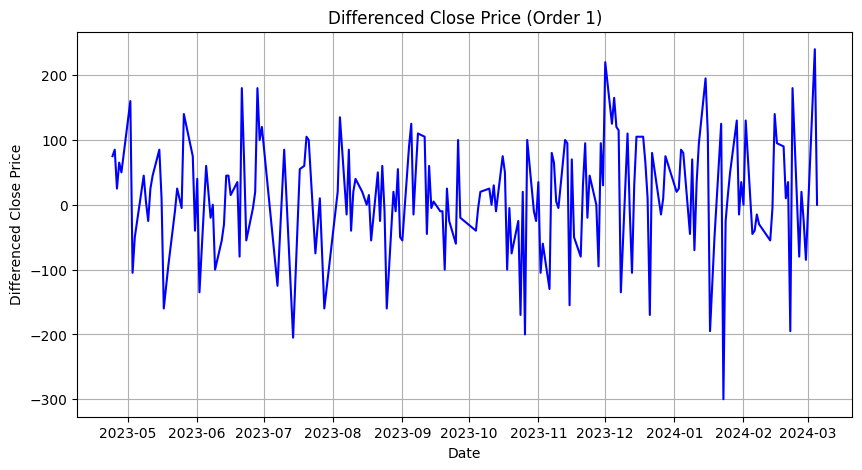

최종 차분 횟수:  1


In [4]:
import copy

from statsmodels.tsa.stattools import adfuller


def get_diff_count(stock_data: pd.DataFrame):
    # 차분 횟수 초기화
    diff_count = 0

    # 정상성 테스트를 위한 함수 정의
    def check_stationarity(timeseries):
        # 주어진 시계열 데이터에 대한 Dickey-Fuller 단위근 검정
        result = adfuller(timeseries)
        print('ADF 통계량: ', result[0])
        print('p-value: ', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
        if result[1] <= 0.05:
            print('시계열이 안정적입니다.')
        else:
            print('시계열이 안정적이지 않습니다.')

    df = copy.deepcopy(stock_data)

    # 주식 종가를 차분하여 정상성을 확인
    while True:
        # 종가 차분
        diff_close = df['Close'].diff().dropna()
        diff_count += 1
        print(f'차분 횟수: {diff_count}')
        print(diff_close)

        # 정상성 확인
        check_stationarity(diff_close)

        # 그래프 그리기
        plt.figure(figsize=(10, 5))
        plt.plot(diff_close, color='blue')
        plt.title(f'Differenced Close Price (Order {diff_count})')
        plt.xlabel('Date')
        plt.ylabel('Differenced Close Price')
        plt.grid(True)
        plt.show()

        # 정상성이 확인되었을 때 반복문 종료
        if adfuller(diff_close)[1] <= 0.05:
            break

        # 차분된 데이터로 DataFrame 업데이트
        df['Close'] = diff_close

    print('최종 차분 횟수: ', diff_count)
    
    return diff_count

diff = get_diff_count(stock_data)

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF 및 PACF 그래프 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(stock_data['Close'].diff().dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('ACF')

plot_pacf(stock_data['Close'].diff().dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
my_portfolio = [
    # Samsung Kodex India Nifty 50 ETF
    "453810.KS",
    # 3M
    "MMM",
    # Microsoft
    "MSFT",
]

In [95]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# 주식 데이터를 불러올 종목과 기간을 설정합니다.
# stock_symbol = '453810.KS'  # 삼성 nifty50
stock_symbol = 'MSFT'  # Microsoft
start_date = '2021-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# 주식 데이터를 불러옵니다.
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data = stock_data.asfreq('B')

# 종가 데이터를 선택합니다.
closing_prices = stock_data['Close']

# ARIMA 모델을 학습시키기 위해 데이터를 학습 및 테스트 세트로 분할합니다.
train_data = closing_prices[:int(0.98*len(closing_prices))]
train_data = train_data.fillna(method='ffill').fillna(method='bfill')
test_data = closing_prices[int(0.98*len(closing_prices)):]
test_data = test_data.fillna(method='ffill').fillna(method='bfill')

# ARIMA 모델을 생성하고 학습합니다.
# ARIMA 모델의 파라미터인 p, d, q는 각각 자동 회귀, 차분, 이동 평균의 차수를 의미합니다.
# 여기서는 일단 각각을 1로 설정하고 사용합니다. 실제로는 모델의 성능을 향상시키기 위해 최적의 파라미터를 찾아야 합니다.

model = ARIMA(train_data, order=(2, 1, 2), freq = 'B', trend = 'c')
fitted_model = model.fit()
fitted_model.summary()
# # 테스트 세트에 대한 예측값을 생성합니다.
forecast = fitted_model.forecast(steps=len(test_data))

# # 예측 결과를 시각화합니다.
# plt.figure(figsize=(12, 6))
# plt.plot(test_data.index, test_data.values, label='Actual Prices')
# plt.plot(test_data.index, forecast, color='red', label='Predicted Prices')
# plt.title('ARIMA Model Forecast for {}'.format(stock_symbol))
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

result = fitted_model.get_forecast(steps = len(test_data.index), alpha = 0.05).summary_frame()
result

fc = tuple(result['mean'].values) # 예측값
se = tuple(result['mean_se'].values) # 표준오차
lower_coef = tuple(result['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(result['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_data.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_data.index)
upper_data = pd.Series(upper_coef, index = test_data.index)

#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_data, label = 'training')
plt.plot(test_data, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_data.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

[*********************100%%**********************]  1 of 1 completed


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [53]:
fc = tuple(result['mean'].values) # 예측값
se = tuple(result['mean_se'].values) # 표준오차
lower_coef = tuple(result['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(result['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_data.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_data.index)
upper_data = pd.Series(upper_coef, index = test_data.index)

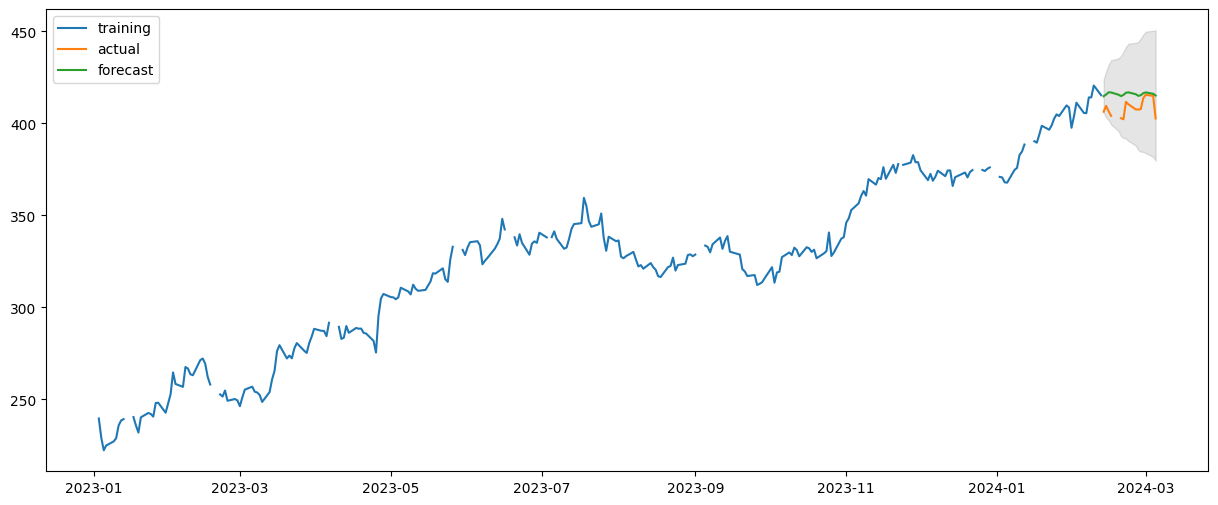

In [54]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_data, label = 'training')
plt.plot(test_data, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_data.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

In [73]:
from itertools import product


# Parameter search
pdq_candidates = list(product([0, 1, 2], repeat=3))

aic = []
for pdq_candidate in pdq_candidates:
    model = ARIMA(train_data, order = (pdq_candidate))
    model_fit = model.fit()
    print(f'ARIMA: {pdq_candidate} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))
    
# Search optimal parameters
min_aic = min(aic)
print(f"min_aic is {min_aic}")
min_idx = aic.index(min_aic)
print(f"min_idx is {min_idx}")
optimal_pdq = list(pdq_candidates)[min_idx]
optimal_pdq

ARIMA: (0, 0, 0) >> AIC : 7210.55
ARIMA: (0, 0, 1) >> AIC : 6392.87
ARIMA: (0, 0, 2) >> AIC : 5815.79
ARIMA: (0, 1, 0) >> AIC : 4332.96
ARIMA: (0, 1, 1) >> AIC : 4334.3
ARIMA: (0, 1, 2) >> AIC : 4331.84
ARIMA: (0, 2, 0) >> AIC : 4855.78
ARIMA: (0, 2, 1) >> AIC : 4335.41
ARIMA: (0, 2, 2) >> AIC : 4336.73
ARIMA: (1, 0, 0) >> AIC : 4346.01
ARIMA: (1, 0, 1) >> AIC : 4347.53
ARIMA: (1, 0, 2) >> AIC : 4345.5
ARIMA: (1, 1, 0) >> AIC : 4334.41
ARIMA: (1, 1, 1) >> AIC : 4333.64
ARIMA: (1, 1, 2) >> AIC : 4333.37
ARIMA: (1, 2, 0) >> AIC : 4669.42
ARIMA: (1, 2, 1) >> AIC : 4336.84
ARIMA: (1, 2, 2) >> AIC : 4334.38
ARIMA: (2, 0, 0) >> AIC : 4347.6
ARIMA: (2, 0, 1) >> AIC : 4349.72


/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA: (2, 0, 2) >> AIC : 4347.11
ARIMA: (2, 1, 0) >> AIC : 4331.84
ARIMA: (2, 1, 1) >> AIC : 4332.94
ARIMA: (2, 1, 2) >> AIC : 4328.74
ARIMA: (2, 2, 0) >> AIC : 4581.87
ARIMA: (2, 2, 1) >> AIC : 4334.22
ARIMA: (2, 2, 2) >> AIC : 4339.55
min_aic is 4328.74
min_idx is 23


(2, 1, 2)